In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import xgboost
import shap

In [3]:
data = pd.read_csv('listings_summary.csv') # orginal berlin

In [4]:
data2 = pd.read_csv('listings_munich_11_2019.csv') # monachium

Columns (43,61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.


In [5]:
# Print columns
print(len(data))
print(len(data.columns))
print(len(data.shape))
data.columns

22552
96
2


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print(data.head(10))
print(data.host_response_rate.unique())
print(data.room_type.unique())
print(data.property_type.unique())
print(len(data.amenities))
print(data.guests_included.unique())
print(data.minimum_nights.unique())


      id                         listing_url       scrape_id last_scraped  \
0   2015   https://www.airbnb.com/rooms/2015  20181107122246   2018-11-07   
1   2695   https://www.airbnb.com/rooms/2695  20181107122246   2018-11-07   
2   3176   https://www.airbnb.com/rooms/3176  20181107122246   2018-11-07   
3   3309   https://www.airbnb.com/rooms/3309  20181107122246   2018-11-07   
4   7071   https://www.airbnb.com/rooms/7071  20181107122246   2018-11-07   
5   9991   https://www.airbnb.com/rooms/9991  20181107122246   2018-11-07   
6  14325  https://www.airbnb.com/rooms/14325  20181107122246   2018-11-07   
7  16401  https://www.airbnb.com/rooms/16401  20181107122246   2018-11-07   
8  16644  https://www.airbnb.com/rooms/16644  20181107122246   2018-11-07   
9  17409  https://www.airbnb.com/rooms/17409  20181107122246   2018-11-07   

                                               name  \
0  Berlin-Mitte Value! Quiet courtyard/very central   
1                Prenzlauer Berg close to 

In [7]:
# host_response_rate  96%
# room_type Entire home/apt Private room
# property_type Apartment Condominium
# accommodates 3 2 4
# amenities {Wifi,Heating,"Family/kid friendly",Essentia
# weekly_price
# monthly_price
# security_deposit
# guests_included 1 1 2 5
# extra_people $28.00
# minimum_nights 2, 4 62

In [8]:
print(len(data2))
print(len(data2.columns))
# Print columns
data2.columns

11481
106


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   listing_url                       22552 non-null  object 
 2   scrape_id                         22552 non-null  int64  
 3   last_scraped                      22552 non-null  object 
 4   name                              22493 non-null  object 
 5   summary                           21589 non-null  object 
 6   space                             14020 non-null  object 
 7   description                       22349 non-null  object 
 8   experiences_offered               22552 non-null  object 
 9   neighborhood_overview             11540 non-null  object 
 10  notes                             7215 non-null   object 
 11  transit                           13036 non-null  object 
 12  acce

In [10]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 9.3+ MB
None


In [11]:
data.host_is_superhost.describe()

count     22526
unique        2
top           f
freq      19515
Name: host_is_superhost, dtype: object

In [12]:
data2.host_is_superhost.describe()

count     11458
unique        2
top           f
freq      10009
Name: host_is_superhost, dtype: object

In [13]:
data.price.describe()

count      22552
unique       295
top       $30.00
freq        1387
Name: price, dtype: object

In [14]:
data2.price.describe()

count       11481
unique        333
top       $100.00
freq          594
Name: price, dtype: object

In [15]:
# Cast price as float
data.price = data.price.apply(lambda x: x.replace("$", ""))
data.price = data.price.apply(lambda x: x.replace(",", ""))
data.price = data.price.astype("float")
data.price.describe()



count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [16]:
# Cast price as float
data2.price = data2.price.apply(lambda x: x.replace("$", ""))
data2.price = data2.price.apply(lambda x: x.replace(",", ""))
data2.price = data2.price.astype("float")



data2.price.describe()

count    11481.000000
mean       116.336469
std        168.078321
min          8.000000
25%         55.000000
50%         82.000000
75%        130.000000
max       9000.000000
Name: price, dtype: float64

In [17]:
#print(data.zipcode.head(10))
#print(data.zipcode.unique())
#print(data.zipcode.isna().sum())
#print(len(data))

pd.set_option('display.max_rows', None)

temp_zipcode = data.zipcode.copy()
data['zipcode2'] = temp_zipcode.str.replace("\D+", "", ).copy()

data.zipcode2.fillna(0, inplace=True)

x_count = data.groupby('zipcode2')['id'].nunique()
x_mean = data.groupby('zipcode2')['price'].mean()

x_count_dict = x_count.to_dict()
x_mean_dict = x_mean.to_dict()

a1 = np.zeros((len(data), 6))


print(a1)
for i in range(0,len(data)):
    val = data.zipcode2[i]
    a1[i][0] = data.id[i]
    a1[i][1] = x_count_dict[val]
    a1[i][2] = x_mean_dict[val]
    a1[i][3] = val
    a1[i][4] = len(data.amenities[i])
    
data['amenities_len'] = a1[:,3]
data['zipcode_count'] = a1[:,1]
data['zipcode_price'] = a1[:,2]
print(data.head())

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
     id                        listing_url       scrape_id last_scraped  \
0  2015  https://www.airbnb.com/rooms/2015  20181107122246   2018-11-07   
1  2695  https://www.airbnb.com/rooms/2695  20181107122246   2018-11-07   
2  3176  https://www.airbnb.com/rooms/3176  20181107122246   2018-11-07   
3  3309  https://www.airbnb.com/rooms/3309  20181107122246   2018-11-07   
4  7071  https://www.airbnb.com/rooms/7071  20181107122246   2018-11-07   

                                               name  \
0  Berlin-Mitte Value! Quiet courtyard/very central   
1                Prenzlauer Berg close to Mauerpark   
2                   Fabulous Flat in great Location   
3                 BerlinSpot Schöneberg near KaDeWe   
4                  BrightRoom with sunny greenview!   

                                             summary  \
0  Great location!  30 of 75 s

In [18]:
#print(data.zipcode.head(10))
#print(data.zipcode.unique())
#print(data.zipcode.isna().sum())
#print(len(data))

pd.set_option('display.max_rows', None)

temp_zipcode = data2.zipcode.copy()
data2['zipcode2'] = temp_zipcode.str.replace("\D+", "", ).copy()

data2.zipcode2.fillna(0, inplace=True)

x_count = data2.groupby('zipcode2')['id'].nunique()
x_mean = data2.groupby('zipcode2')['price'].mean()

x_count_dict = x_count.to_dict()
x_mean_dict = x_mean.to_dict()

a1 = np.zeros((len(data2), 6))
print(a1)
for i in range(0,len(data2)):
    val = data2.zipcode2[i]
    a1[i][0] = data2.id[i]
    a1[i][1] = x_count_dict[val]
    a1[i][2] = x_mean_dict[val]
    a1[i][3] = val
    a1[i][4] = len(data2.amenities[i])
    
data2['amenities_len'] = a1[:,3]
data2['zipcode_count'] = a1[:,1]
data2['zipcode_price'] = a1[:,2]
print(data2.head())

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
       id                          listing_url       scrape_id last_scraped  \
0   36720   https://www.airbnb.com/rooms/36720  20191125094942   2019-11-25   
1   97945   https://www.airbnb.com/rooms/97945  20191125094942   2019-11-25   
2  114695  https://www.airbnb.com/rooms/114695  20191125094942   2019-11-25   
3  127383  https://www.airbnb.com/rooms/127383  20191125094942   2019-11-25   
4  157808  https://www.airbnb.com/rooms/157808  20191125094942   2019-11-25   

                                  name  \
0  Beautiful 2 rooms flat, Glockenbach   
1     Deluxw-Apartm. with roof terrace   
2   Apartment Munich/East with sundeck   
3    City apartment next to Pinakothek   
4          Near Olympia,English Garden   

                                             summary  \
0  Very quiet, yet centrally located 2 rooms apt....   
1                           

In [19]:
# Get rid of outliers
print("99.7% properties have a price lower than {0: .2f}".format(np.percentile(data.price, 99.7)))
data = data[(data.price <= np.percentile(data.price, 99.7)) & (data.price > 0)]


99.7% properties have a price lower than  550.00


In [20]:
# Get rid of outliers
print("99.7% properties have a price lower than {0: .2f}".format(np.percentile(data2.price, 99.7)))
data2 = data2[(data2.price <= np.percentile(data2.price, 99.7)) & (data2.price > 0)]

99.7% properties have a price lower than  999.00


In [21]:
## Visualizing the important characteristics of a dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
cols = ['price', 'host_is_superhost', 'bedrooms', 'number_of_reviews', 'review_scores_rating', 'beds', 'bathrooms']
# 'square_feet', 'calculated_host_listings_count'
cols2 = ['accommodates', 'amenities_len', 'minimum_nights', 'zipcode_count', 'zipcode_price']
cols = cols + cols2
# host_response_rate  96%
# room_type Entire home/apt Private room
# property_type Apartment Condominium
# accommodates 3 2 4
# amenities {Wifi,Heating,"Family/kid friendly",Essentia
# weekly_price
# monthly_price
# security_deposit
# guests_included 1 1 2 5
# extra_people $28.00
# minimum_nights 2, 4 62

In [23]:
cols

['price',
 'host_is_superhost',
 'bedrooms',
 'number_of_reviews',
 'review_scores_rating',
 'beds',
 'bathrooms',
 'accommodates',
 'amenities_len',
 'minimum_nights',
 'zipcode_count',
 'zipcode_price']

In [24]:
print(data[cols].isna().sum())
print(data2[cols].isna().sum())
##data3 = data[cols].copy()
###sub2['income'].fillna((sub2['income'].mean()), inplace=True) 
data.fillna((data[cols].mean()), inplace=True)
data2.fillna((data2[cols].mean()), inplace=True)
###data3.apply(lambda x: x.fillna(x.mean()),axis=0)
###data2.apply(lambda x: x.fillna(x.mean()),axis=0)

#data.dropna(inplace=True)
#data2.dropna(inplace=True)
print(data[cols].isna().sum())
print(data2[cols].isna().sum())

price                      0
host_is_superhost         25
bedrooms                  18
number_of_reviews          0
review_scores_rating    4349
beds                      39
bathrooms                 32
accommodates               0
amenities_len              0
minimum_nights             0
zipcode_count              0
zipcode_price              0
dtype: int64
price                      0
host_is_superhost         23
bedrooms                  30
number_of_reviews          0
review_scores_rating    2719
beds                      18
bathrooms                 21
accommodates               0
amenities_len              0
minimum_nights             0
zipcode_count              0
zipcode_price              0
dtype: int64
price                    0
host_is_superhost       25
bedrooms                 0
number_of_reviews        0
review_scores_rating     0
beds                     0
bathrooms                0
accommodates             0
amenities_len            0
minimum_nights           0
zipcode_

In [25]:
data['number_of_reviews'] = data['number_of_reviews'].astype(float)
data['accommodates'] = data['accommodates'].astype(float)
data['amenities_len'] = data['amenities_len'].astype(float)
data['minimum_nights'] = data['minimum_nights'].astype(float)

data2['number_of_reviews'] = data2['number_of_reviews'].astype(float)
data2['accommodates'] = data2['accommodates'].astype(float)
data2['amenities_len'] = data2['amenities_len'].astype(float)
data2['minimum_nights'] = data2['minimum_nights'].astype(float)

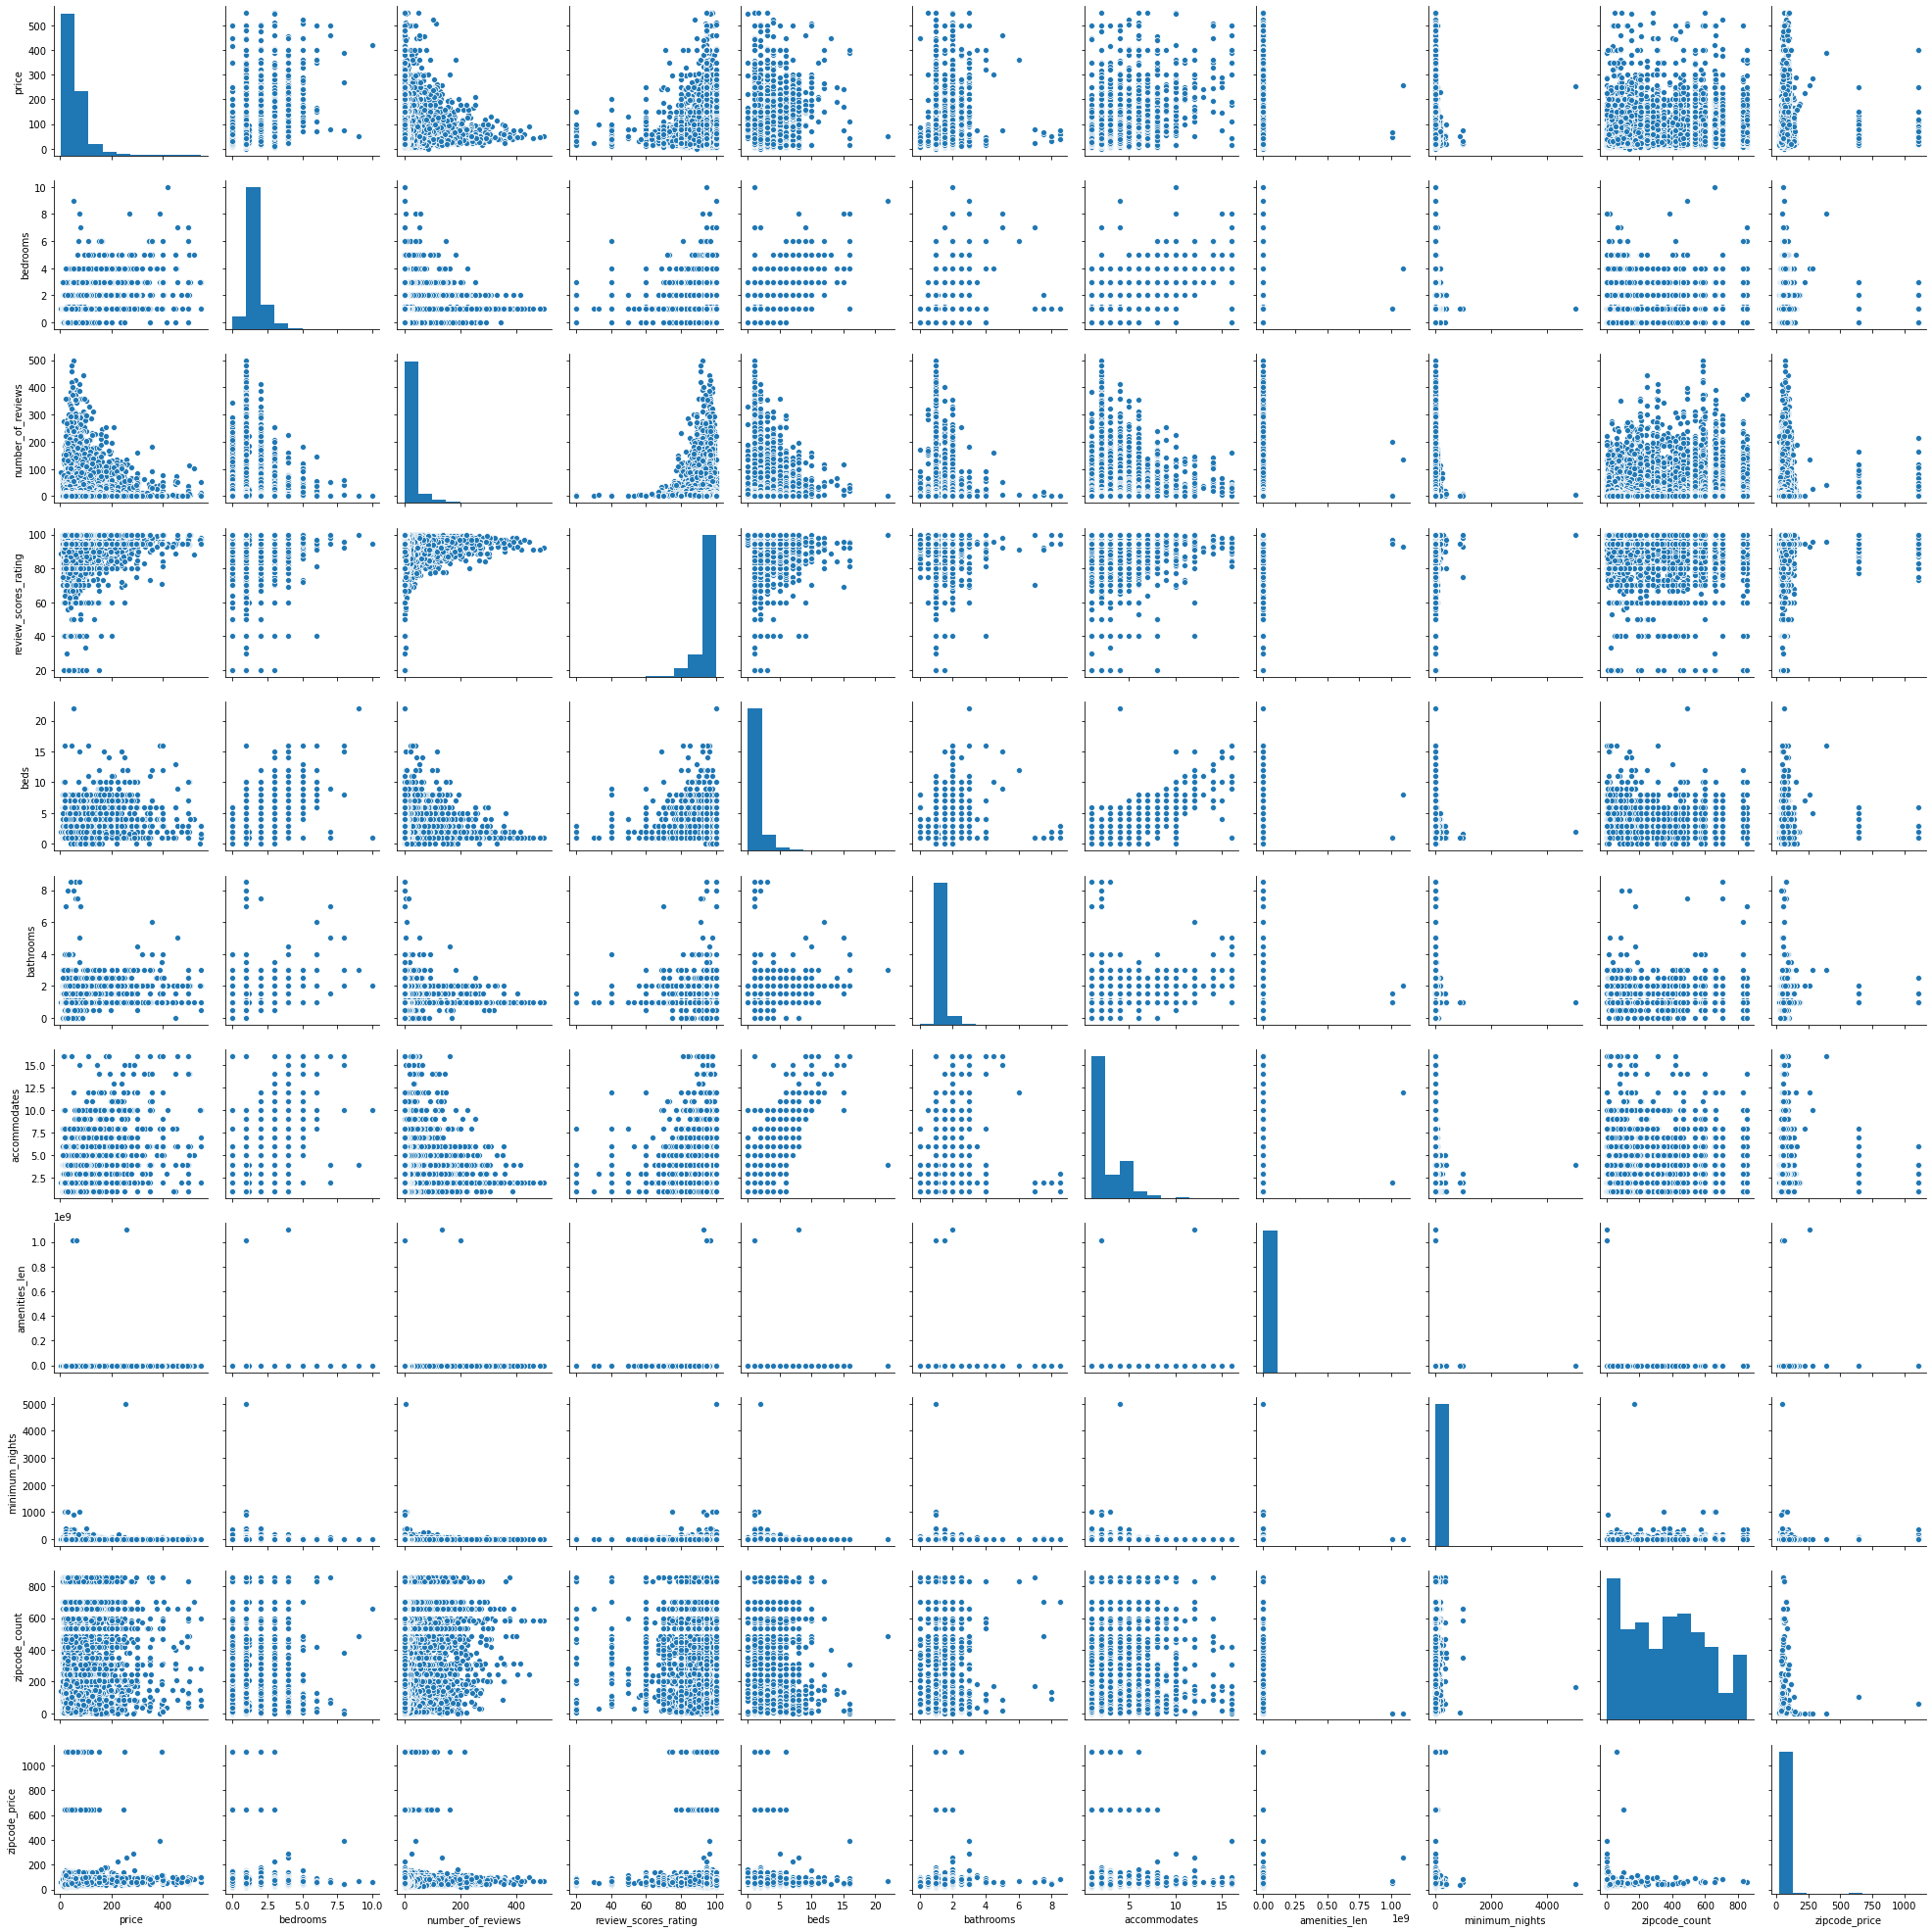

In [26]:
#cols = ['price', 'host_is_superhost', 'bedrooms', 'number_of_reviews', 'review_scores_rating']

sns.pairplot(data[cols], height=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

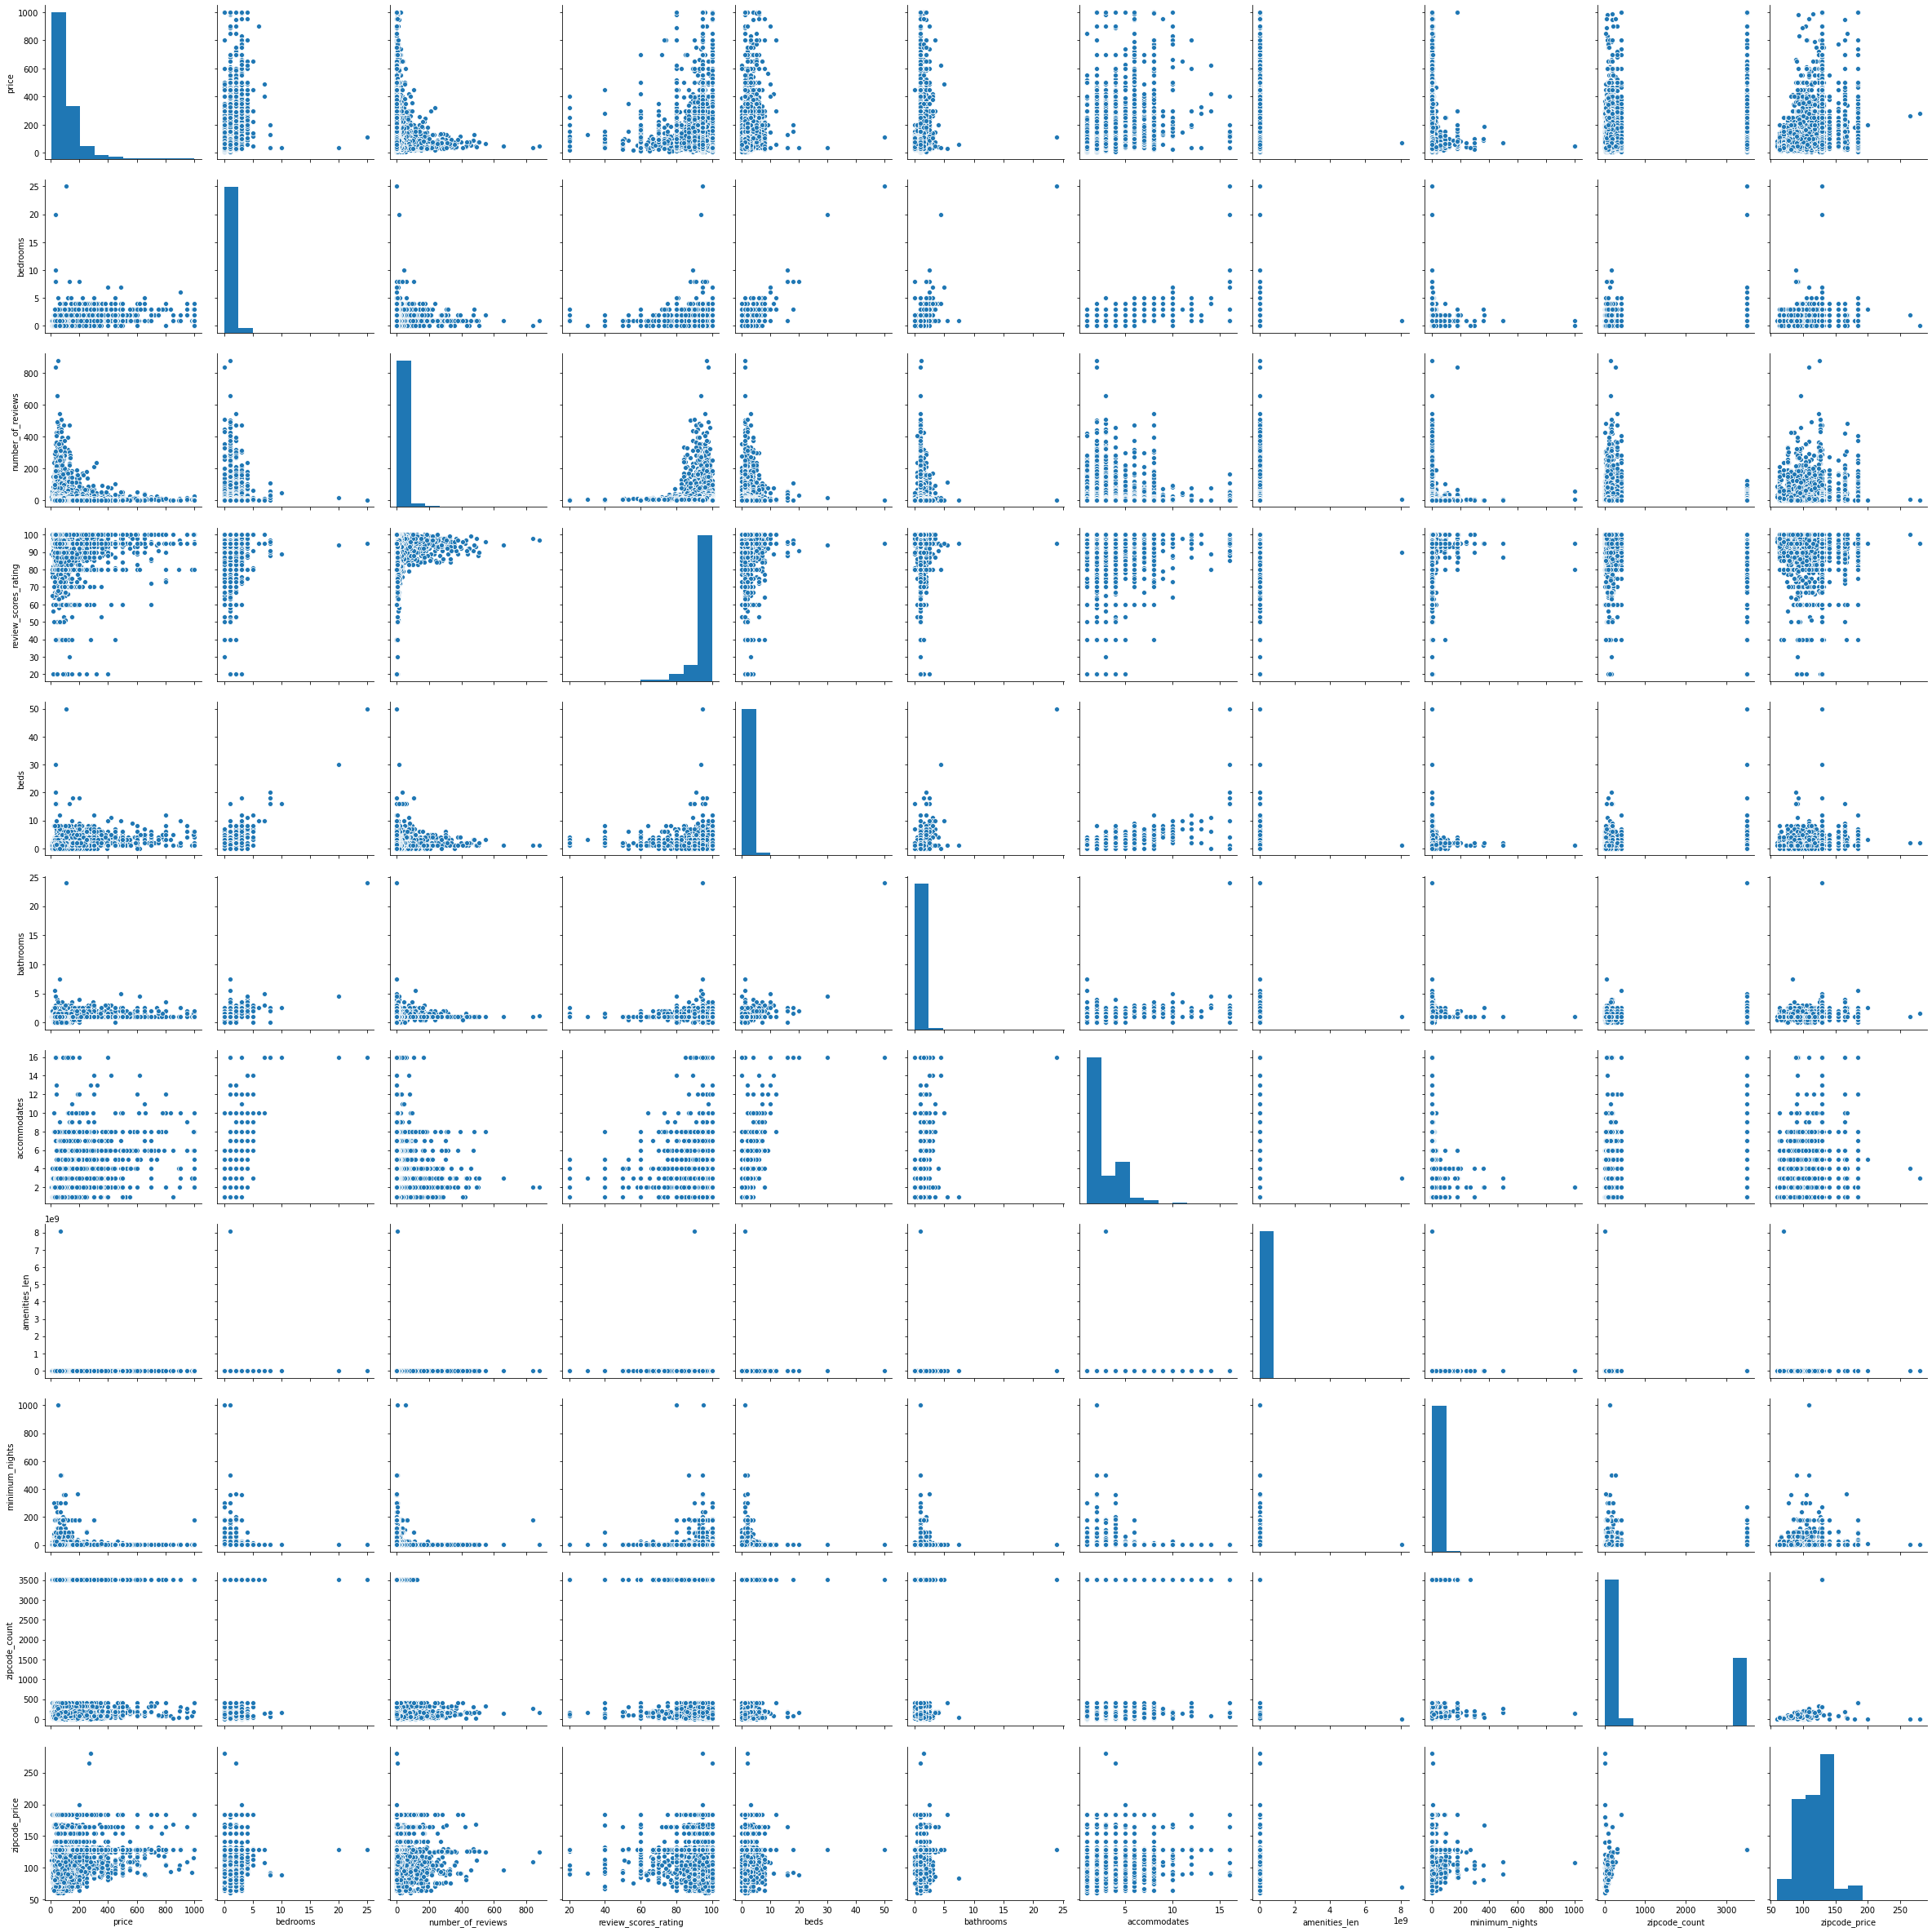

In [27]:
#cols = ['price', 'host_is_superhost', 'bedrooms', 'number_of_reviews', 'review_scores_rating']

sns.pairplot(data2[cols], height=3)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

In [28]:
print(data[cols].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22479 entries, 0 to 22551
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 22479 non-null  float64
 1   host_is_superhost     22454 non-null  object 
 2   bedrooms              22479 non-null  float64
 3   number_of_reviews     22479 non-null  float64
 4   review_scores_rating  22479 non-null  float64
 5   beds                  22479 non-null  float64
 6   bathrooms             22479 non-null  float64
 7   accommodates          22479 non-null  float64
 8   amenities_len         22479 non-null  float64
 9   minimum_nights        22479 non-null  float64
 10  zipcode_count         22479 non-null  float64
 11  zipcode_price         22479 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.9+ MB
None


In [29]:
print(data[cols].describe())
print(data[cols].info())
data[cols].values.T
print(cols)


print(data[cols].info())

cols_for_heatmap = cols.copy()
cols_for_heatmap.remove('host_is_superhost')
#df = data[cols].replace({'host_is_superhost' : {'t' : 1, 'f' : 0}}, inplace=False)




              price      bedrooms  number_of_reviews  review_scores_rating  \
count  22479.000000  22479.000000       22479.000000          22479.000000   
mean      58.308021      1.158809          17.877619             94.414010   
std       45.678653      0.637756          36.814993              6.853521   
min        1.000000      0.000000           0.000000             20.000000   
25%       30.000000      1.000000           1.000000             93.000000   
50%       45.000000      1.000000           5.000000             95.000000   
75%       70.000000      1.000000          16.000000            100.000000   
max      550.000000     10.000000         498.000000            100.000000   

               beds     bathrooms  accommodates  amenities_len  \
count  22479.000000  22479.000000  22479.000000   2.247900e+04   
mean       1.617291      1.091371      2.631612   1.497655e+05   
std        1.161282      0.324717      1.489118   1.202406e+07   
min        0.000000      0.000000

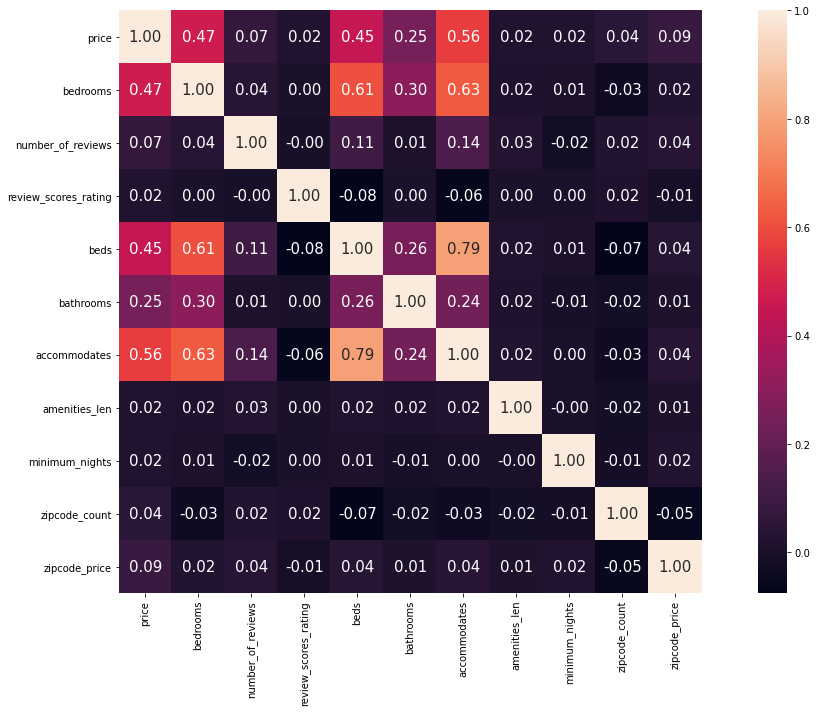

In [30]:
cm = np.corrcoef(data[cols_for_heatmap].values.T)
#sns.set(font_scale=1.5)
plt.figure(figsize = (16,10))
#fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols_for_heatmap,
                 xticklabels=cols_for_heatmap)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

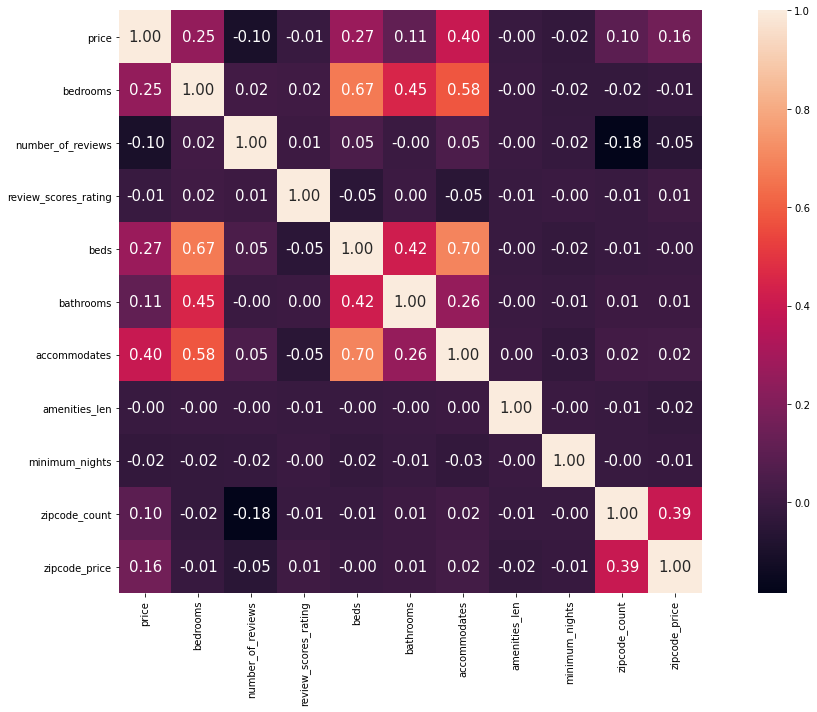

In [31]:
cm = np.corrcoef(data2[cols_for_heatmap].values.T)
#sns.set(font_scale=1.5)
plt.figure(figsize = (16,10))
#fig, ax = plt.subplots(figsize=(20,16))         # Sample figsize in inches

hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols_for_heatmap,
                 xticklabels=cols_for_heatmap)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

# Solving regression for regression parameters with gradient descent
z ksiązki 296

In [32]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=5):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [33]:
X = data[['accommodates']].values #+ data2[['beds']].values + data2[['bedrooms']].values + data2[['review_scores_rating']].values 
y = data['price'].values
print(X)
print(y)

[[3.]
 [2.]
 [4.]
 ...
 [2.]
 [2.]
 [2.]]
[60. 17. 90. ... 85. 99. 45.]


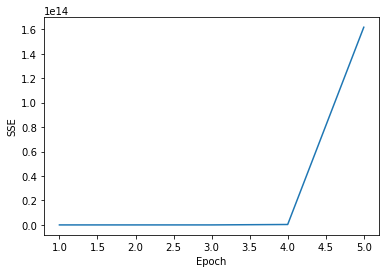

In [34]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [35]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

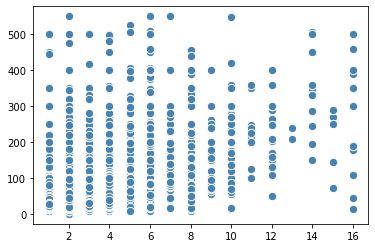

In [36]:
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
#plt.plot(X, y, color='black', lw=2)    
plt.show()

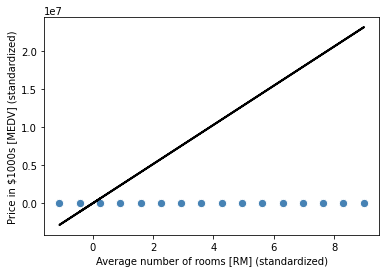

In [37]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [38]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 2575887.143
Intercept: 0.000


In [39]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 187138828.318


# Estimating the coefficient of a regression model via scikit-learn 
z książki  300 str

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
X = data[['accommodates']].values #+ data2[['beds']].values + data2[['bedrooms']].values + data2[['review_scores_rating']].values 
y = data['price'].values
print(X)
print(y)

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

[[3.]
 [2.]
 [4.]
 ...
 [2.]
 [2.]
 [2.]]
[60. 17. 90. ... 85. 99. 45.]
Slope: 17.284
Intercept: 12.824


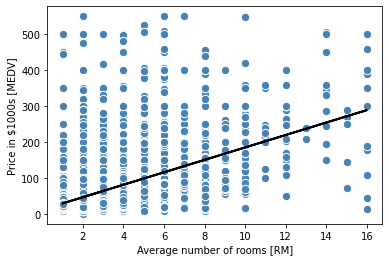

In [42]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

# dla 2 zbioru

In [43]:
X = data2[['accommodates']].values #+ data2[['beds']].values + data2[['bedrooms']].values + data2[['review_scores_rating']].values 
y = data2['price'].values
print(X)
print(y)

[[2.]
 [2.]
 [5.]
 ...
 [2.]
 [1.]
 [2.]]
[95. 80. 95. ... 30. 40. 60.]


In [44]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 27.363
Intercept: 39.483


In [45]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 27.363
Intercept: 39.483


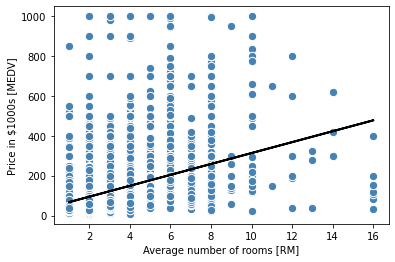

In [46]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

# Fitting a robust regression model using RANSAC
str 301


[ True  True  True ...  True  True  True]
[False False False ... False False False]


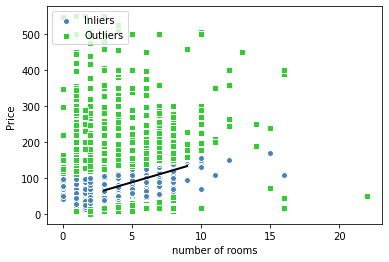

Slope: 11.238
Intercept: 32.521


In [47]:
from sklearn.linear_model import RANSACRegressor

X = data[['beds']].values #+ data2[['beds']].values + data2[['bedrooms']].values + data2[['review_scores_rating']].values 
y = data['price'].values

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=10, 
                         loss='absolute_loss', 
                         residual_threshold=50.0, 
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

print(inlier_mask)
print(outlier_mask)


line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('number of rooms')
plt.ylabel('Price ')
plt.legend(loc='upper left')


#plt.savefig('images/10_08.png', dpi=300)
plt.show()
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

# Evaluating the performance of linear regression models
304

In [48]:
from sklearn.model_selection import train_test_split
cols = [ 'bedrooms', 'beds', 'bathrooms', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'zipcode_price', 'amenities_len'] 
#cols = [ 'bedrooms', 'number_of_reviews', 'review_scores_rating', 'beds', 'bathrooms']
# 'square_feet', 'calculated_host_listings_count',  'host_is_superhost'
#cols2 = ['accommodates', 'amenities_len', 'minimum_nights', 'zipcode_count', 'zipcode_price']
#cols = cols + cols2
#data[cols]
X = data[cols] # X = data[['accommodates']].values #X = data.iloc[:, :-1].values
y = data['price'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


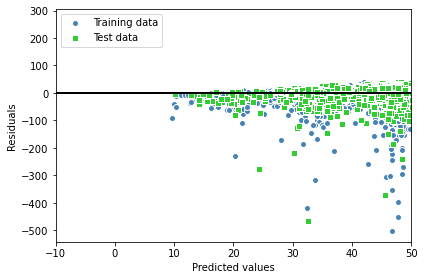

MSE train: 1318.481, test: 1455.202
R^2 train: 0.356, test: 0.349


In [49]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])

#plt.ylim([-0.0000000000001, 0.0000000000001])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# Using regularized methods for regression
307 str

In [50]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[ 1.21060483e+01 -2.91642834e+00  1.45466302e+01  1.47337314e+01
 -2.55888757e-03  2.92906841e-01  4.42399373e-02  1.23315367e-08]


In [51]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1318.671, test: 1452.616
R^2 train: 0.356, test: 0.351


In [102]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
print(ridge)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
print(lasso)

from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
print(elanet)

print(lasso.coef_)

print(lasso.intercept_)


Ridge()
Lasso()
ElasticNet()


AttributeError: 'Lasso' object has no attribute 'coef_'

# Turning a linear regression model into a curve - polynomial regression
308 str


In [53]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [54]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

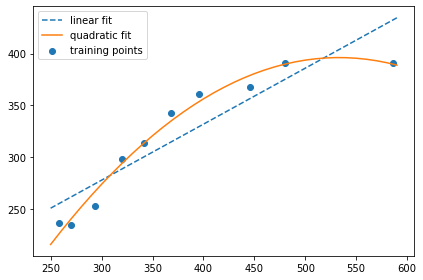

In [55]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/10_10.png', dpi=300)
plt.show()

In [56]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [57]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


# Modeling nonlinear relationships in the Housing Dataset
310 str

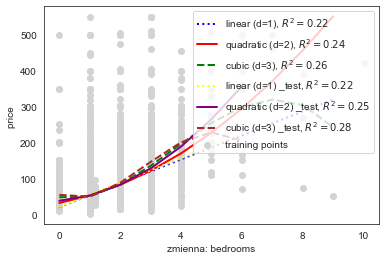

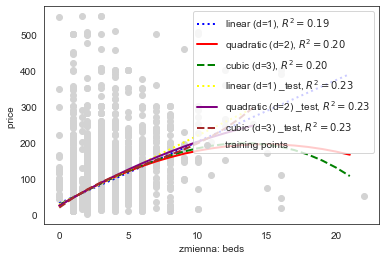

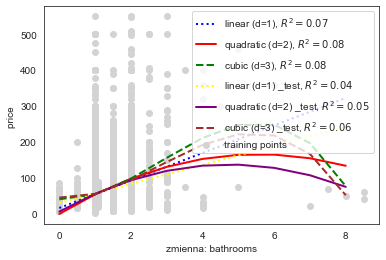

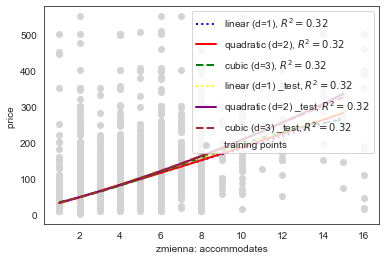

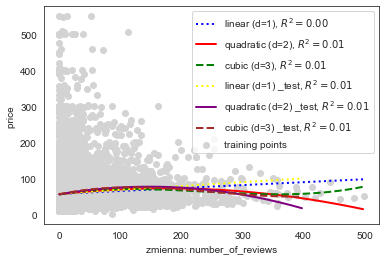

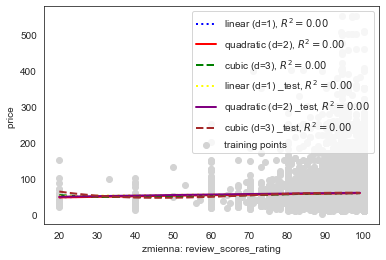

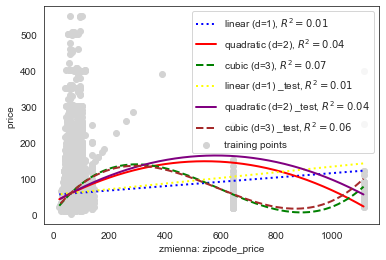

   cubic_mse_test  cubic_mse_train  cubic_r2_test  cubic_r2_train    data  \
0        1609.698         1509.888          0.280           0.263  berlin   
1        1719.490         1642.957          0.231           0.198  berlin   
2        2102.707         1877.084          0.060           0.084  berlin   
3        1510.194         1396.725          0.325           0.318  berlin   
4        2208.443         2032.539          0.013           0.008  berlin   
5        2235.045         2047.468          0.001           0.001  berlin   
6        2091.493         1900.925          0.065           0.072  berlin   

   linear_mse_test  linear_mse_train  linear_r2_test  linear_r2_train  \
0         1750.132          1599.445           0.218            0.219   
1         1726.215          1658.210           0.228            0.191   
2         2146.974          1902.248           0.040            0.071   
3         1514.939          1400.398           0.323            0.316   
4         2221.501

In [121]:
results = pd.DataFrame()
#results =results.append(['zm2', 1.0, 2.0, 3.0], ignore_index=True)
#results.append(['zm3', 1.0, 2.0, 3.0])

cols = [ 'bedrooms', 'beds', 'bathrooms', 'accommodates', 'number_of_reviews','review_scores_rating', 'zipcode_price']
#'number_of_reviews', 'review_scores_rating', 'zipcode_price', 'amenities_len', 'minimum_nights', 'zipcode_count'] 
# 'amenities_len'
# 'square_feet', 'calculated_host_listings_count',  'host_is_superhost'
#cols2 = ['accommodates', 'amenities_len', 'minimum_nights', 'zipcode_count', 'zipcode_price']
#cols = cols + cols2
#col = ['accommodates', 'beds']
city = 'berlin'
for i in cols:
    X = data[[i]].values
    y = data['price'].values
    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

    '''  
    slr = LinearRegression()

    slr.fit(X_train, y_train)
    y_train_pred = slr.predict(X_train)
    y_test_pred = slr.predict(X_test)

    plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
    plt.xlim([-10, 50])
    plt.tight_layout()

    # plt.savefig('images/10_09.png', dpi=300)
    plt.show()
    '''     
    regr = LinearRegression()

    # create quadratic features
    quadratic = PolynomialFeatures(degree=2)
    cubic = PolynomialFeatures(degree=3)
    X_quad_train = quadratic.fit_transform(X_train)
    X_cubic_train = cubic.fit_transform(X_train)
    
    quadratic = PolynomialFeatures(degree=2)
    cubic = PolynomialFeatures(degree=3)
    X_quad_test = quadratic.fit_transform(X_test)
    X_cubic_test = cubic.fit_transform(X_test)


    # fit features
    X_fit_train = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]
    X_fit_test = np.arange(X_test.min(), X_test.max(), 1)[:, np.newaxis]
    
    
    regr = regr.fit(X_train, y_train)
    y_lin_fit_train = regr.predict(X_fit_train)
    y_train_pred = regr.predict(X_train)
    linear_r2_train = r2_score(y_train, y_train_pred)
    linear_mse_train =  mean_squared_error(y_train, y_train_pred)
    
    regr = regr.fit(X_test, y_test)
    y_lin_fit_test = regr.predict(X_fit_test)
    y_test_pred = regr.predict(X_test)
    linear_r2_test = r2_score(y_test, y_test_pred)
    linear_mse_test = mean_squared_error(y_test, y_test_pred)

    
    regr = regr.fit(X_quad_train, y_train)
    y_quad_fit_train = regr.predict(quadratic.fit_transform(X_fit_train))
    y_train_pred = regr.predict(X_quad_train)
    quadratic_r2_train = r2_score(y_train, y_train_pred)
    quadratic_mse_train = mean_squared_error(y_train, y_train_pred)
    
    regr = regr.fit(X_quad_test, y_test)
    y_quad_fit_test = regr.predict(quadratic.fit_transform(X_fit_test))
    y_test_pred = regr.predict(X_quad_test)
    quadratic_r2_test = r2_score(y_test, y_test_pred)
    quadratic_mse_test = mean_squared_error(y_test, y_test_pred)

    regr = regr.fit(X_cubic_train, y_train)
    y_cubic_fit_train = regr.predict(cubic.fit_transform(X_fit_train))
    y_train_pred = regr.predict(X_cubic_train)
    cubic_r2_train = r2_score(y_train, y_train_pred)
    cubic_mse_train = mean_squared_error(y_train, y_train_pred)
    
    regr = regr.fit(X_cubic_test, y_test)
    y_cubic_fit_test = regr.predict(cubic.fit_transform(X_fit_test))
    y_test_pred = regr.predict(X_cubic_test)
    cubic_r2_test = r2_score(y_test, y_test_pred)
    cubic_mse_test = mean_squared_error(y_test, y_test_pred)


    # plot results
    plt.scatter(X_train, y_train, label='training points', color='lightgray')

    plt.plot(X_fit_train, y_lin_fit_train, 
             label='linear (d=1), $R^2=%.2f$' % linear_r2_train, 
             color='blue', 
             lw=2, 
             linestyle=':')

    plt.plot(X_fit_train, y_quad_fit_train, 
             label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2_train,
             color='red', 
             lw=2,
             linestyle='-')

    plt.plot(X_fit_train, y_cubic_fit_train, 
             label='cubic (d=3), $R^2=%.2f$' % cubic_r2_train,
             color='green', 
             lw=2, 
             linestyle='--')
    
    plt.plot(X_fit_test, y_lin_fit_test, 
             label='linear (d=1) _test, $R^2=%.2f$' % linear_r2_test, 
             color='yellow', 
             lw=2, 
             linestyle=':')
    
    plt.plot(X_fit_test, y_quad_fit_test, 
             label='quadratic (d=2) _test, $R^2=%.2f$' % quadratic_r2_test,
             color='purple', 
             lw=2,
             linestyle='-')
    
    plt.plot(X_fit_test, y_cubic_fit_test, 
             label='cubic (d=3) _test, $R^2=%.2f$' % cubic_r2_test,
             color='brown', 
             lw=2, 
             linestyle='--')

    plt.xlabel('zmienna: ' + i)
    plt.ylabel('price ')
    plt.legend(loc='upper right')
    
    plt.figsize = (50,50)
    plt.title = "test_title"
    #plt.annotate(ha='center', va='bottom', xy=(0,0), size =15)

    #plt.ylim([25.0, 300])
    #plt.figure(figsize=(30,30))

    #plt.savefig('images/10_11.png', dpi=300)
    new_row_train = {'zmienna':i, 'data': city,
                     'linear_r2_train':round(linear_r2_train, 3), 'quadratic_r2_train':round(quadratic_r2_train, 3), 'cubic_r2_train':round(cubic_r2_train, 3),
                      'linear_mse_train':round(linear_mse_train, 3), 'quadratic_mse_train':round(quadratic_mse_train, 3), 'cubic_mse_train':round(cubic_mse_train, 3),
                     'linear_r2_test':round(linear_r2_test, 3), 'quadratic_r2_test':round(quadratic_r2_test, 3), 'cubic_r2_test':round(cubic_r2_test, 3),
                      'linear_mse_test':round(linear_mse_test, 3), 'quadratic_mse_test':round(quadratic_mse_test, 3), 'cubic_mse_test':round(cubic_mse_test, 3)
                    }
    
    #new_row_test= {'zmienna':i, 'linear_r2':round(linear_r2_test, 3), 'quadratic_r2':round(quadratic_r2_test, 3), 'cubic_r2':round(cubic_r2_test, 3), 'data':'_test'}
    
    #print(new_row)
    results= results.append(new_row_train, ignore_index=True)
    #results= results.append(new_row_test, ignore_index=True)
    plt.show()
    
    


print(results)

NameError: name 'data' is not defined

In [91]:
# Our first linear model
str = 'host_is_superhost + bedrooms + accommodates + beds + bathrooms + number_of_reviews + review_scores_rating' 
model = smf.ols('price ~ ' + str, data=data).fit()

# Inspect the results
print(model.summary())

#y = a1*x1 + a2*x2 + b
#Cena = współ_1* zmienna1 + współ_2 * zmienna2 + wyraz_wolny

#Zarobki = wpsół_1 * wiek + współ_2 * wiek^2 + wyraz_wolny
#   OLS Regression Results                            
#==============================================================================
#Dep. Variable:                  price   R-squared:                       0.229
#Model:                            OLS   Adj. R-squared:                  0.229
#Method:                 Least Squares   F-statistic:                     1661.
#Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
#Time:                        21:22:21   Log-Likelihood:            -1.1277e+05
#No. Observations:               22416   AIC:                         2.256e+05
#Df Residuals:                   22411   BIC:                         2.256e+05
#Df Model:                           4                                         
#Covariance Type:            nonrobust                        

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1748.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:04:03   Log-Likelihood:            -1.1279e+05
No. Observations:               22454   AIC:                         2.256e+05
Df Residuals:                   22446   BIC:                         2.257e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -31

In [92]:
# Our first linear model
model2 = smf.ols('price ~ ' + str, data=data2).fit()

# Inspect the results
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     347.3
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:04:12   Log-Likelihood:                -67914.
No. Observations:               11431   AIC:                         1.358e+05
Df Residuals:                   11423   BIC:                         1.359e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 14

In [93]:
data.replace({'host_is_superhost' : {'t' : True, 'f' : False}}, inplace=True)

# Our first linear model
model = smf.ols('price ~ bedrooms + host_is_superhost', data=data).fit()

# Inspect the results
print(model.summary())

#y = a1*x1 + a2*x2 + b

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     3221.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:04:13   Log-Likelihood:            -1.1485e+05
No. Observations:               22454   AIC:                         2.297e+05
Df Residuals:                   22451   BIC:                         2.297e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [94]:
data2.replace({'host_is_superhost' : {'t' : True, 'f' : False}}, inplace=True)

# Our first linear model
model2 = smf.ols('price ~ bedrooms + host_is_superhost', data=data2).fit()

# Inspect the results
print(model2.summary())

#y = a1*x1 + a2*x2 + b

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     434.7
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          1.10e-182
Time:                        14:04:14   Log-Likelihood:                -68598.
No. Observations:               11431   AIC:                         1.372e+05
Df Residuals:                   11428   BIC:                         1.372e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Bottom 5th percentile of p-values is:
0.04203194266329013
Bottom 5th percentile of x coefficient is:
-0.29407809645421745


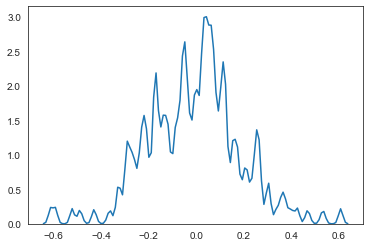

In [95]:
# Checking p-values meaning
N = 200 #1000 # 2000
pvalues = np.zeros(N)
params = np.zeros(N)
for i in range(N):
    df = pd.DataFrame({'x' : np.random.normal(size=30), 'y' : np.random.normal(size=30)})
    model = smf.ols('y ~ x', data=df).fit()
    pvalues[i] = model.pvalues.x
    params[i] = model.params.x
sns.set_style('white')
sns.kdeplot(params, bw=0.01)
print('Bottom 5th percentile of p-values is:')
print(np.percentile(pvalues, 5))
print('Bottom 5th percentile of x coefficient is:')
print(np.percentile(params, 5))

In [96]:
model.params

Intercept   -0.470162
x           -0.055761
dtype: float64

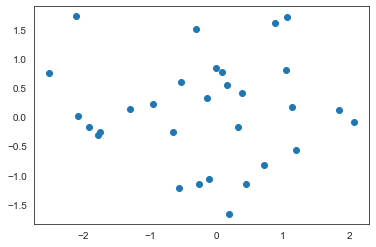

In [97]:
plt.scatter(np.random.normal(size=30), np.random.normal(size=30))

0.9582790091264668


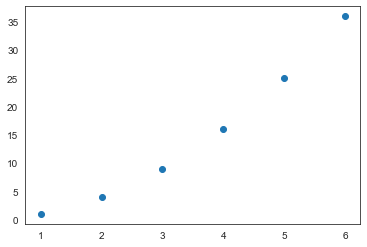

In [98]:
# Checking R^2 meaning
df = pd.DataFrame({'x' : [1,2,3,4,5,6], 'y' : [1,4,9,16,25,36]})
model = smf.ols('y ~ x', data=df).fit()
print(model.rsquared)
plt.scatter(x=df.x, y=df.y)

In [99]:
def rsquared(y_true, y_theo):
    y_true = np.array(y_true)
    y_theo = np.array(y_theo)
    return sum((y_theo-y_true.mean())**2)/sum((y_true-y_true.mean())**2)

In [100]:
df = pd.DataFrame({'x' : [1,2,3,4,5,6], 'y' : [1,4,9,16,25,36]})
df['x2'] = df.x**2
model = smf.ols('y ~ x + x2', data=df).fit()
model.rsquared

1.0

Pass eps=5e-05 as keyword args. From version 0.25 passing these as positional arguments will result in an error


(0.0006517032877775601,
 35.089962751313045,
 -0.6682674094882896,
 12.017727294477005)

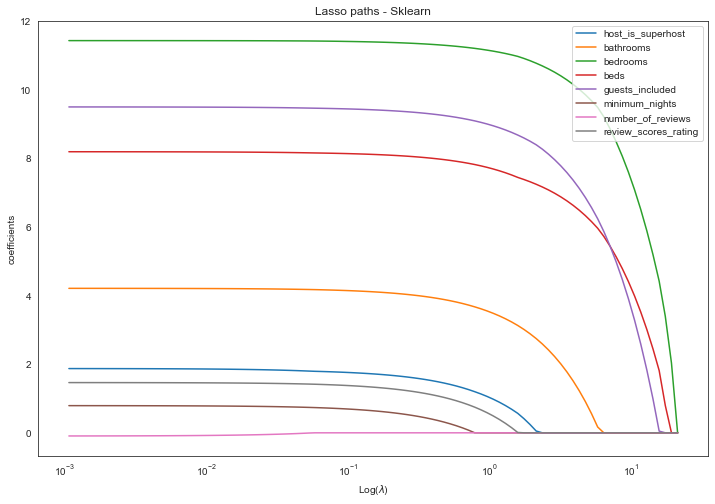

In [101]:
# Lasso 

variables = ['host_is_superhost', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']

data_subset = data.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)

X = data_subset.loc[:,variables]
X = preprocessing.scale(X)
y = np.array(data_subset.price)

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, 5e-5, fit_intercept=False)

# Display results
plt.figure(figsize = (12,8))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = variables[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

In [ ]:
# Lasso 

variables = ['host_is_superhost', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']

data_subset = data2.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)

X = data_subset.loc[:,variables]
X = preprocessing.scale(X)
y = np.array(data_subset.price)

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, 5e-5, fit_intercept=False)

# Display results
plt.figure(figsize = (12,8))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = variables[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

In [ ]:
# XGBoost
# 'guests_included',
variables = ['bathrooms', 'bedrooms', 'beds',  'minimum_nights', 'number_of_reviews', 'review_scores_rating']

data_subset = data.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)
data_subset = data_subset.iloc[:1000,:]

X = data_subset.loc[:,variables]
#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that
y = np.array(data_subset.price)

model = xgboost.XGBRegressor(n_estimators=10)
model.fit(X, y)

In [ ]:
# XGBoost
# 'guests_included',
variables = ['bathrooms', 'bedrooms', 'beds',  'minimum_nights', 'number_of_reviews', 'review_scores_rating']

data_subset = data2.loc[:, variables + ['price']]
data_subset.dropna(inplace=True)
data_subset = data_subset.iloc[:1000,:]

X2 = data_subset.loc[:,variables]
#X = preprocessing.scale(X) #We don't have to scale it as trees don't care about distributions, means, and all that
y2 = np.array(data_subset.price)

model2 = xgboost.XGBRegressor(n_estimators=10)
model2.fit(X2, y2)

In [ ]:
predicted = model.predict(X)
mean_squared_error(y, predicted)
#What does it even mean? Todo: check different error functions and how they can be explained
#Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)

In [ ]:
predicted2 = model2.predict(X)
mean_squared_error(y2, predicted2)
#What does it even mean? Todo: check different error functions and how they can be explained
#Did we do a proper training and prediction? NO - we need to have proper TRAIN and TEST sets! Todo at home ;)

In [ ]:
#Playing with Shapley values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
X.iloc[0,:]

In [ ]:
#Playing with Shapley values
explainer2 = shap.TreeExplainer(model2)
shap_values2 = explainer2.shap_values(X2)
X2.iloc[0,:]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer2.expected_value, shap_values2[0,:], X2.iloc[0,:])

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values2, X2, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

In [ ]:
shap.summary_plot(shap_values2, features=X2, feature_names=X2.columns)

In [ ]:
data.guests_included.describe()

In [ ]:
data2.guests_included.describe()

In [ ]:
#Sources:
#https://www.kaggle.com/yaowenling/berlin-airbnb-data-exploration-public
#https://xavierbourretsicotte.github.io/lasso_implementation.html